In [1]:
import math
import fileinput

import numpy as np

from astropy import constants as c
from astropy import units as u

import matplotlib.pyplot as plt

from scipy.integrate import quad
from scipy.misc import derivative
from scipy.integrate import odeint

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

rcParams.update({'figure.autolayout': True})
plt.rc('font', family='serif')

In [9]:
H02 = 67.3**2. * u.km**2. /u.s**2. /u.Mpc**2.

def A(w):
    result = ((9./4.)*(1+w)**2 * H02)**(1/(3*(1+w)))
    return result

def x(w):
    result = 2/(3*(1+w))
    return result

def t_r(w):
    result = ((9./4.)*(1+w)**2. * H02)**(-0.5) + 13.8 *u.Gyr
    return result.to(u.Gyr)

def a(t,w):
    a=A(w)*(t_r(w) - t)**x(w)
    return a

110.65906108698638 Gyr
23.48590610869865 Gyr


/usr/local/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


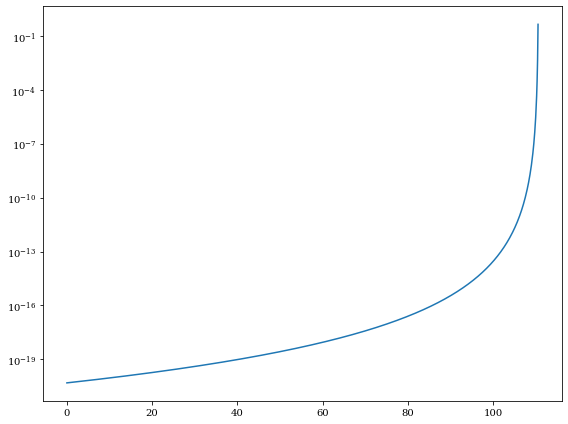

In [10]:
w1 = -1.1
w2 = -2

for w in [w1,w2]:
    print(t_r(w))

def plotter(w):
    tr_v=t_r(w) #set the value for RIP time
    #Make an array of times from 0 to RIP time:
    ts=np.linspace(0,tr_v,1000)
    
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111)
    ax.plot(ts,a(ts,w))
    ax.set_yscale('log')
    plt.show()
    
plotter(-1.1)

In [3]:
def plotter(w1,w2,f):
    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(111)
    #m1
    plt.plot(a_log,eps_f(a_log,m1),label = '$\epsilon_1(a)$')
    #m2
    plt.plot(a_log,eps_f(a_log,m2),label = '$\epsilon_2(a)$')
    #m3
    plt.plot(a_log,eps_f(a_log,m3),label = '$\epsilon_3(a)$')
    ax.set_yscale('log')
    ax.set_xlabel('log $a$')
    ax.set_ylabel('$\epsilon (a)$ [eV/$nm^3$]')
    ax.legend()
    plt.savefig('444hw43d'+f+'.pdf')
    plt.show()
    
    ax.plot(ts,a_s)
    ax.set_yscale('log')
    ax.set_xlabel('$t$ / Gyr')
    ax.set_ylabel('$a(t)$')
    ax.set_title('$a(t,w={0:0.1f})$'.format(w))
    ax.set_xlim(0,tr.value+5.)
    plt.show()